## Deskripsi Dataset
Pima Indian diabetes dataset berisi 768 sampel pasien wanita berusia minimal 21 tahun.
268 pasien positif diabetes dan 500 pasien negatif.
Setiap sampel memiliki 8 atribut numerik.

**Atribut:**
- Pregnancies: Jumlah kehamilan
- Glucose: Konsentrasi plasma glukosa
- BloodPressure: Tekanan darah diastolik
- SkinThickness: Ketebalan lipatan kulit
- Insulin: Insulin serum 2 jam
- BMI: Indeks massa tubuh
- DiabetesPedigreeFunction: Fungsi pedigree diabetes
- Age: Usia (tahun)
- Outcome: Variabel target (0 atau 1)

## Import Library

In [49]:
# Impor library yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

# Pengaturan matplotlib dan seaborn
plt.rc('font', size=12)
sns.set(style='whitegrid', color_codes=True)

## 1. Load Data

In [50]:
# Baca dataset dari file diabetes.xls menggunakan pd.read_excel()
# PENTING: Gunakan pd.read_excel() untuk file .xls/.xlsx, BUKAN pd.read_csv()
# pd.read_csv() untuk file .csv (text-based), sedangkan .xls adalah file binary

try:
    df = pd.read_excel('diabetes.xls')
except FileNotFoundError:
    print("File 'diabetes.xls' tidak ditemukan.")
    raise
except Exception as e:
    print(f"Error: {e}")
    raise

# Tampilkan informasi dasar
print("Shape dataset:", df.shape)
print("\nKolom-kolom:")
print(list(df.columns))
print("\nLima data pertama:")
print(df.head())
print("\nInfo dataset:")
print(df.info())

Shape dataset: (768, 9)

Kolom-kolom:
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

Lima data pertama:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 

## 2. Explorasi Data

In [51]:
# Cek nilai yang hilang
print("Nilai yang hilang:")
print(df.isnull().sum())
print("\nStatistik deskriptif:")
print(df.describe())

Nilai yang hilang:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Statistik deskriptif:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.0

Distribusi kelas Outcome:
Outcome
0    500
1    268
Name: count, dtype: int64


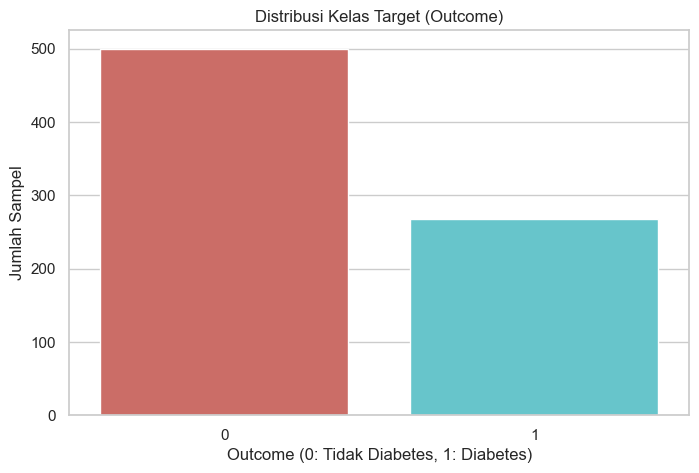

In [52]:
# Distribusi kelas target
print("Distribusi kelas Outcome:")
print(df['Outcome'].value_counts())

# Visualisasi distribusi
plt.figure(figsize=(8, 5))
sns.countplot(x='Outcome', data=df, palette='hls')
plt.title('Distribusi Kelas Target (Outcome)')
plt.xlabel('Outcome (0: Tidak Diabetes, 1: Diabetes)')
plt.ylabel('Jumlah Sampel')
plt.show()

## 3. Preprocessing

In [53]:
# Pisahkan fitur (X) dan target (y)
X = df.drop('Outcome', axis=1).values  # Konversi ke numpy array
y = df['Outcome'].values  # Konversi ke numpy array

print(f"Shape X: {X.shape}")
print(f"Shape y: {y.shape}")
print(f"\nX (5 baris pertama):\n{X[:5]}")
print(f"\ny (10 nilai pertama): {y[:10]}")

Shape X: (768, 8)
Shape y: (768,)

X (5 baris pertama):
[[6.000e+00 1.480e+02 7.200e+01 3.500e+01 0.000e+00 3.360e+01 6.270e-01
  5.000e+01]
 [1.000e+00 8.500e+01 6.600e+01 2.900e+01 0.000e+00 2.660e+01 3.510e-01
  3.100e+01]
 [8.000e+00 1.830e+02 6.400e+01 0.000e+00 0.000e+00 2.330e+01 6.720e-01
  3.200e+01]
 [1.000e+00 8.900e+01 6.600e+01 2.300e+01 9.400e+01 2.810e+01 1.670e-01
  2.100e+01]
 [0.000e+00 1.370e+02 4.000e+01 3.500e+01 1.680e+02 4.310e+01 2.288e+00
  3.300e+01]]

y (10 nilai pertama): [1 0 1 0 1 0 1 0 1 1]


In [54]:
# Normalisasi/scaling data menggunakan StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Data setelah scaling:")
print(f"Mean setiap fitur (mendekati 0): {X_scaled.mean(axis=0).round(4)}")
print(f"Std setiap fitur (mendekati 1): {X_scaled.std(axis=0).round(4)}")

Data setelah scaling:
Mean setiap fitur (mendekati 0): [-0. -0.  0.  0. -0.  0.  0.  0.]
Std setiap fitur (mendekati 1): [1. 1. 1. 1. 1. 1. 1. 1.]


In [55]:
# Split data menjadi train dan test (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Ukuran training set: {X_train.shape[0]} sampel")
print(f"Ukuran test set: {X_test.shape[0]} sampel")
print(f"Distribusi kelas train: {np.bincount(y_train)}")
print(f"Distribusi kelas test: {np.bincount(y_test)}")

Ukuran training set: 614 sampel
Ukuran test set: 154 sampel
Distribusi kelas train: [400 214]
Distribusi kelas test: [100  54]


## 4. Logistic Regression Manual dengan Gradient Descent

In [56]:
# ============================================================================
# IMPLEMENTASI LOGISTIC REGRESSION MANUAL (DARI NOL)
# ============================================================================

class LogisticRegressionManual:
    """
    Implementasi Logistic Regression manual menggunakan numpy.
    Menggunakan Binary Cross-Entropy loss dan Gradient Descent untuk training.
    """
    
    def __init__(self, learning_rate=0.01, epochs=1000, verbose=True):
        """
        Inisialisasi parameter model.
        
        Args:
            learning_rate: Laju pembelajaran (learning rate) untuk gradient descent
            epochs: Jumlah iterasi training
            verbose: Jika True, tampilkan loss setiap epoch
        """
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.verbose = verbose
        self.weights = None
        self.bias = None
        self.loss_history = []
    
    def sigmoid(self, z):
        """
        Fungsi sigmoid manual: σ(z) = 1 / (1 + exp(-z))
        Clipping untuk menghindari overflow pada nilai z yang sangat negatif atau positif.
        
        Args:
            z: Input (bisa scalar atau array)
        
        Returns:
            Probabilitas antara 0 dan 1
        """
        # Clipping z untuk menghindari overflow
        z_clipped = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z_clipped))
    
    def compute_loss(self, y_true, y_pred):
        """
        Hitung Binary Cross-Entropy Loss (log loss) manual.
        Loss = -(1/m) * sum(y*log(y_pred) + (1-y)*log(1-y_pred))
        
        Args:
            y_true: Label aktual (0 atau 1)
            y_pred: Probabilitas prediksi (antara 0 dan 1)
        
        Returns:
            Nilai loss (scalar)
        """
        m = len(y_true)
        # Clipping untuk menghindari log(0)
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
        loss = -(1/m) * np.sum(y_true * np.log(y_pred_clipped) + 
                               (1 - y_true) * np.log(1 - y_pred_clipped))
        return loss
    
    def fit(self, X, y):
        """
        Training model menggunakan Gradient Descent.
        
        Algoritma:
        1. Inisialisasi w = 0 dan b = 0
        2. Untuk setiap epoch:
           a. Forward pass: z = X*w + b, y_hat = sigmoid(z)
           b. Hitung loss
           c. Backward pass (compute gradients):
              dw = (1/m) * X^T * (y_hat - y)
              db = (1/m) * sum(y_hat - y)
           d. Update weights: w = w - lr*dw, b = b - lr*db
        
        Args:
            X: Data fitur training (shape: m x n)
            y: Label training (shape: m,)
        """
        m, n = X.shape  # m = jumlah sampel, n = jumlah fitur
        
        # Inisialisasi weights dan bias dengan nol
        self.weights = np.zeros(n)
        self.bias = 0
        
        print(f"Mulai training Logistic Regression Manual...")
        print(f"Jumlah fitur: {n}, Jumlah sampel: {m}")
        print(f"Learning rate: {self.learning_rate}, Epochs: {self.epochs}")
        print()
        
        # Training loop
        for epoch in range(self.epochs):
            # ===== FORWARD PASS =====
            # Hitung z = X*w + b
            z = np.dot(X, self.weights) + self.bias
            
            # Hitung y_hat = sigmoid(z)
            y_pred = self.sigmoid(z)
            
            # ===== COMPUTE LOSS =====
            loss = self.compute_loss(y, y_pred)
            self.loss_history.append(loss)
            
            # ===== BACKWARD PASS (COMPUTE GRADIENTS) =====
            # Error = y_pred - y_true
            error = y_pred - y
            
            # Gradient terhadap weights: dw = (1/m) * X^T * error
            dw = (1/m) * np.dot(X.T, error)
            
            # Gradient terhadap bias: db = (1/m) * sum(error)
            db = (1/m) * np.sum(error)
            
            # ===== UPDATE WEIGHTS DAN BIAS =====
            self.weights = self.weights - self.learning_rate * dw
            self.bias = self.bias - self.learning_rate * db
            
            # Print progress
            if self.verbose and (epoch % (self.epochs // 10)) == 0:
                print(f"Epoch {epoch:4d}/{self.epochs}: Loss = {loss:.6f}")
        
        print(f"Epoch {self.epochs:4d}/{self.epochs}: Loss = {loss:.6f}")
        print("Training selesai!\n")
        
        return self
    
    def predict_proba(self, X):
        """
        Prediksi probabilitas (output sigmoid).
        
        Args:
            X: Data fitur untuk prediksi
        
        Returns:
            Array probabilitas (antara 0 dan 1)
        """
        z = np.dot(X, self.weights) + self.bias
        return self.sigmoid(z)
    
    def predict(self, X, threshold=0.5):
        """
        Prediksi kelas (0 atau 1) dengan threshold 0.5.
        
        Args:
            X: Data fitur untuk prediksi
            threshold: Threshold untuk klasifikasi (default 0.5)
        
        Returns:
            Array prediksi kelas (0 atau 1)
        """
        y_proba = self.predict_proba(X)
        return (y_proba >= threshold).astype(int)
    
    def get_weights(self):
        """
        Dapatkan weights dan bias hasil training.
        """
        return self.weights, self.bias


print("Kelas LogisticRegressionManual berhasil didefinisikan.")

Kelas LogisticRegressionManual berhasil didefinisikan.


In [57]:
# ============================================================================
# TRAINING MODEL LOGISTIC REGRESSION MANUAL
# ============================================================================

# Inisialisasi model dengan learning rate dan epochs
learning_rate = 0.1
epochs = 1000

# Buat instance model
model = LogisticRegressionManual(learning_rate=learning_rate, 
                                 epochs=epochs, 
                                 verbose=True)

# Mulai training
model.fit(X_train, y_train)

# Tampilkan weights dan bias hasil training
weights, bias = model.get_weights()
print(f"Weights (bobot) hasil training: {weights}")
print(f"Bias hasil training: {bias}")

Mulai training Logistic Regression Manual...
Jumlah fitur: 8, Jumlah sampel: 614
Learning rate: 0.1, Epochs: 1000

Epoch    0/1000: Loss = 0.693147
Epoch  100/1000: Loss = 0.478687
Epoch  200/1000: Loss = 0.468663
Epoch  300/1000: Loss = 0.466834
Epoch  400/1000: Loss = 0.466387
Epoch  500/1000: Loss = 0.466263
Epoch  600/1000: Loss = 0.466225
Epoch  700/1000: Loss = 0.466213
Epoch  800/1000: Loss = 0.466209
Epoch  900/1000: Loss = 0.466208
Epoch 1000/1000: Loss = 0.466207
Training selesai!

Weights (bobot) hasil training: [ 0.38624893  1.17967353 -0.21507999  0.06861774 -0.14486753  0.72968969
  0.25995814  0.18140869]
Bias hasil training: -0.8811272100976383


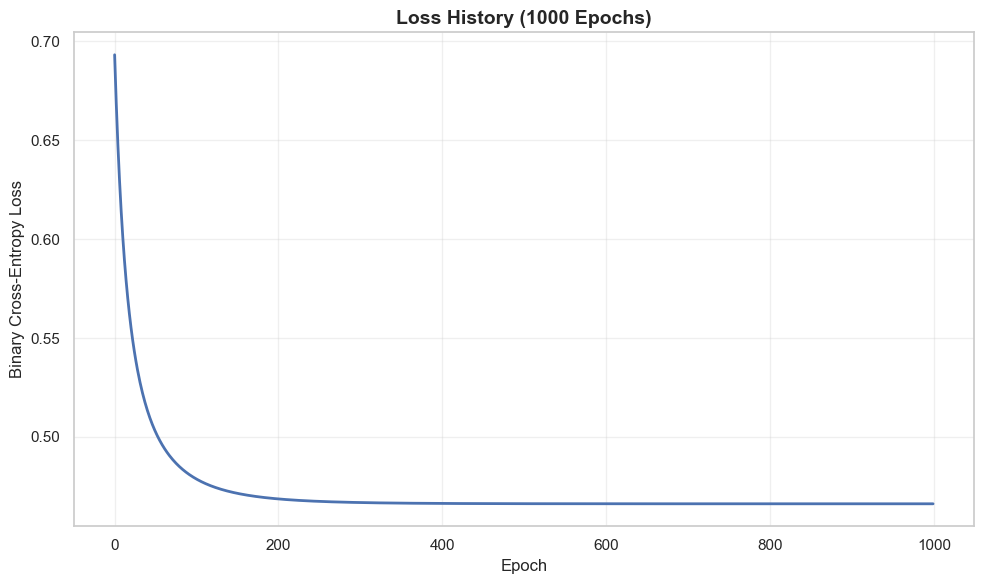

Loss awal (epoch 0): 0.693147
Loss akhir (epoch 1000): 0.466207
Penurunan loss: 0.226940


In [58]:
# Visualisasi loss history selama training
plt.figure(figsize=(10, 6))
plt.plot(model.loss_history, linewidth=2)
plt.title(f'Loss History ({epochs} Epochs)', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Binary Cross-Entropy Loss', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Loss awal (epoch 0): {model.loss_history[0]:.6f}")
print(f"Loss akhir (epoch {epochs}): {model.loss_history[-1]:.6f}")
print(f"Penurunan loss: {model.loss_history[0] - model.loss_history[-1]:.6f}")

## 5. Prediksi pada Training dan Test Set

In [59]:
# Prediksi pada training set
y_train_pred_proba = model.predict_proba(X_train)
y_train_pred = model.predict(X_train, threshold=0.5)

print("Prediksi pada Training Set:")
print(f"Jumlah prediksi 0: {(y_train_pred == 0).sum()}")
print(f"Jumlah prediksi 1: {(y_train_pred == 1).sum()}")
print(f"Min probabilitas: {y_train_pred_proba.min():.6f}")
print(f"Max probabilitas: {y_train_pred_proba.max():.6f}")
print(f"Mean probabilitas: {y_train_pred_proba.mean():.6f}")

Prediksi pada Training Set:
Jumlah prediksi 0: 444
Jumlah prediksi 1: 170
Min probabilitas: 0.001695
Max probabilitas: 0.970787
Mean probabilitas: 0.348555


In [60]:
# Prediksi pada test set
y_test_pred_proba = model.predict_proba(X_test)
y_test_pred = model.predict(X_test, threshold=0.5)

print("Prediksi pada Test Set:")
print(f"Jumlah prediksi 0: {(y_test_pred == 0).sum()}")
print(f"Jumlah prediksi 1: {(y_test_pred == 1).sum()}")
print(f"Min probabilitas: {y_test_pred_proba.min():.6f}")
print(f"Max probabilitas: {y_test_pred_proba.max():.6f}")
print(f"Mean probabilitas: {y_test_pred_proba.mean():.6f}")

Prediksi pada Test Set:
Jumlah prediksi 0: 108
Jumlah prediksi 1: 46
Min probabilitas: 0.001582
Max probabilitas: 0.993086
Mean probabilitas: 0.354384


## 6. Evaluasi Model

In [61]:
# ============================================================================
# HITUNG METRIK EVALUASI PADA TRAINING SET
# ============================================================================

print("="*80)
print("EVALUASI PADA TRAINING SET")
print("="*80)

# Hitung confusion matrix
cm_train = confusion_matrix(y_train, y_train_pred)

# Extract komponen confusion matrix
tn_train = cm_train[0, 0]
fp_train = cm_train[0, 1]
fn_train = cm_train[1, 0]
tp_train = cm_train[1, 1]

# Hitung metrik
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)

print(f"\nConfusion Matrix:")
print(f"  Actual 0 -> Predicted 0 (TN): {tn_train}  |  Predicted 1 (FP): {fp_train}")
print(f"  Actual 1 -> Predicted 0 (FN): {fn_train}  |  Predicted 1 (TP): {tp_train}")

print(f"\nMetrik Evaluasi (Training Set):")
print(f"  Accuracy:  {accuracy_train:.4f} ({accuracy_train*100:.2f}%)")
print(f"  Precision: {precision_train:.4f}")
print(f"  Recall:    {recall_train:.4f}")
print(f"  F1-Score:  {f1_train:.4f}")

EVALUASI PADA TRAINING SET

Confusion Matrix:
  Actual 0 -> Predicted 0 (TN): 359  |  Predicted 1 (FP): 41
  Actual 1 -> Predicted 0 (FN): 85  |  Predicted 1 (TP): 129

Metrik Evaluasi (Training Set):
  Accuracy:  0.7948 (79.48%)
  Precision: 0.7588
  Recall:    0.6028
  F1-Score:  0.6719


In [62]:
# ============================================================================
# HITUNG METRIK EVALUASI PADA TEST SET
# ============================================================================

print("="*80)
print("EVALUASI PADA TEST SET")
print("="*80)

# Hitung confusion matrix
cm_test = confusion_matrix(y_test, y_test_pred)

# Extract komponen confusion matrix
tn_test = cm_test[0, 0]
fp_test = cm_test[0, 1]
fn_test = cm_test[1, 0]
tp_test = cm_test[1, 1]

# Hitung metrik
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print(f"\nConfusion Matrix:")
print(f"  Actual 0 -> Predicted 0 (TN): {tn_test}  |  Predicted 1 (FP): {fp_test}")
print(f"  Actual 1 -> Predicted 0 (FN): {fn_test}  |  Predicted 1 (TP): {tp_test}")

print(f"\nMetrik Evaluasi (Test Set):")
print(f"  Accuracy:  {accuracy_test:.4f} ({accuracy_test*100:.2f}%)")
print(f"  Precision: {precision_test:.4f}")
print(f"  Recall:    {recall_test:.4f}")
print(f"  F1-Score:  {f1_test:.4f}")

EVALUASI PADA TEST SET

Confusion Matrix:
  Actual 0 -> Predicted 0 (TN): 82  |  Predicted 1 (FP): 18
  Actual 1 -> Predicted 0 (FN): 26  |  Predicted 1 (TP): 28

Metrik Evaluasi (Test Set):
  Accuracy:  0.7143 (71.43%)
  Precision: 0.6087
  Recall:    0.5185
  F1-Score:  0.5600


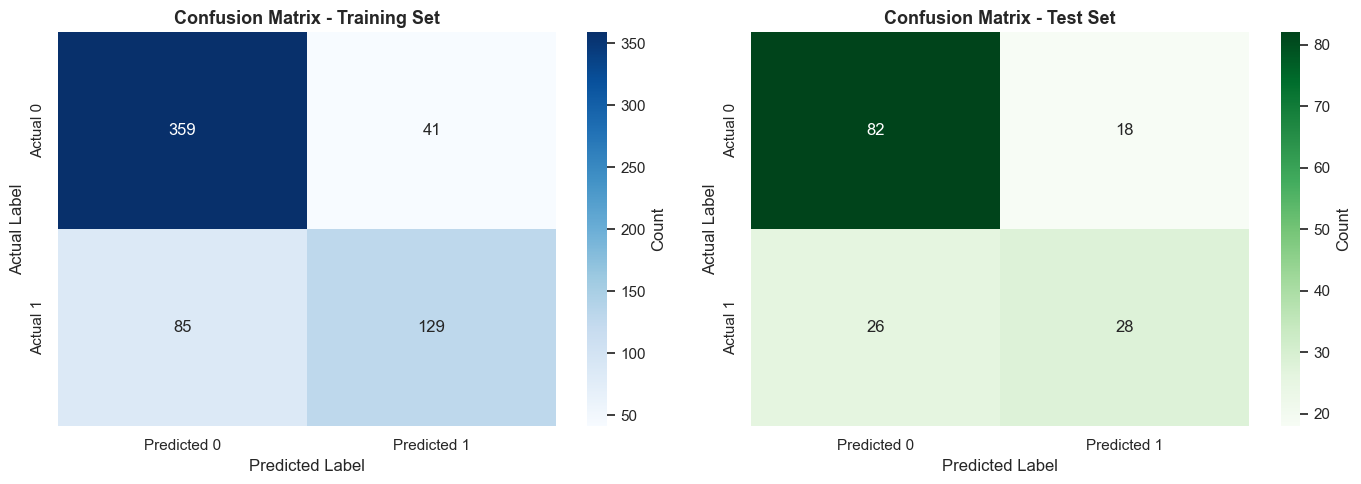

In [63]:
# ============================================================================
# VISUALISASI CONFUSION MATRIX
# ============================================================================

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Confusion Matrix Training Set
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', 
           xticklabels=['Predicted 0', 'Predicted 1'],
           yticklabels=['Actual 0', 'Actual 1'],
           ax=axes[0], cbar_kws={'label': 'Count'})
axes[0].set_title('Confusion Matrix - Training Set', fontsize=13, fontweight='bold')
axes[0].set_ylabel('Actual Label')
axes[0].set_xlabel('Predicted Label')

# Confusion Matrix Test Set
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens',
           xticklabels=['Predicted 0', 'Predicted 1'],
           yticklabels=['Actual 0', 'Actual 1'],
           ax=axes[1], cbar_kws={'label': 'Count'})
axes[1].set_title('Confusion Matrix - Test Set', fontsize=13, fontweight='bold')
axes[1].set_ylabel('Actual Label')
axes[1].set_xlabel('Predicted Label')

plt.tight_layout()
plt.show()

In [64]:
# ============================================================================
# RINGKASAN PERBANDINGAN TRAINING VS TEST
# ============================================================================

print("="*80)
print("RINGKASAN PERBANDINGAN TRAINING vs TEST")
print("="*80)

# Buat DataFrame untuk perbandingan
comparison_df = pd.DataFrame({
    'Metrik': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Training Set': [accuracy_train, precision_train, recall_train, f1_train],
    'Test Set': [accuracy_test, precision_test, recall_test, f1_test]
})

# Hitung selisih
comparison_df['Selisih (Train-Test)'] = comparison_df['Training Set'] - comparison_df['Test Set']

print("\n")
print(comparison_df.to_string(index=False))
print("\n")
print("Catatan:")
print("- Selisih positif berarti Training Set lebih baik dari Test Set (indikasi overfitting)")
print("- Selisih negatif berarti Test Set lebih baik dari Training Set (indikasi underfitting)")

RINGKASAN PERBANDINGAN TRAINING vs TEST


   Metrik  Training Set  Test Set  Selisih (Train-Test)
 Accuracy      0.794788  0.714286              0.080503
Precision      0.758824  0.608696              0.150128
   Recall      0.602804  0.518519              0.084285
 F1-Score      0.671875  0.560000              0.111875


Catatan:
- Selisih positif berarti Training Set lebih baik dari Test Set (indikasi overfitting)
- Selisih negatif berarti Test Set lebih baik dari Training Set (indikasi underfitting)


## 7. Visualisasi Performa Metrik

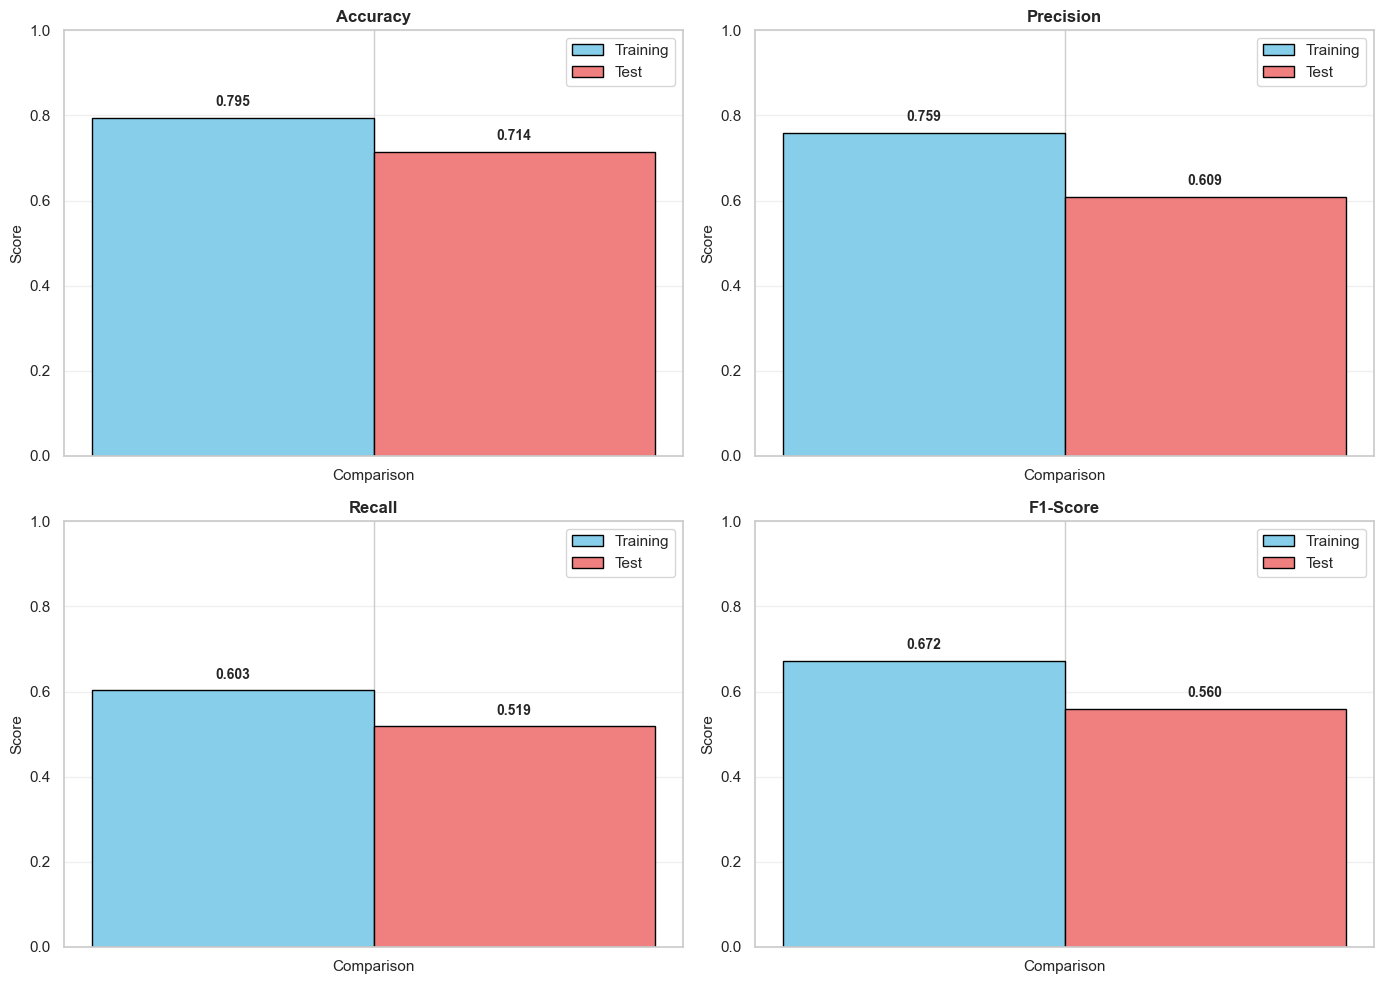

In [65]:
# Visualisasi perbandingan metrik
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

metrik_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
train_scores = [accuracy_train, precision_train, recall_train, f1_train]
test_scores = [accuracy_test, precision_test, recall_test, f1_test]

x_pos = np.array([0])
width = 0.35

for idx, (ax, metrik_name, train_score, test_score) in enumerate(zip(axes.flatten(), 
                                                                       metrik_names, 
                                                                       train_scores, 
                                                                       test_scores)):
    bars1 = ax.bar(x_pos[0] - width/2, train_score, width, label='Training', color='skyblue', edgecolor='black')
    bars2 = ax.bar(x_pos[0] + width/2, test_score, width, label='Test', color='lightcoral', edgecolor='black')
    
    ax.set_ylabel('Score', fontsize=11)
    ax.set_title(f'{metrik_name}', fontsize=12, fontweight='bold')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(['Comparison'])
    ax.set_ylim([0, 1])
    ax.legend()
    ax.grid(True, alpha=0.3, axis='y')
    
    # Tampilkan nilai di atas bar
    ax.text(x_pos[0] - width/2, train_score + 0.02, f'{train_score:.3f}', 
           ha='center', va='bottom', fontsize=10, fontweight='bold')
    ax.text(x_pos[0] + width/2, test_score + 0.02, f'{test_score:.3f}', 
           ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

## 8. Analisis Hasil dan Kesimpulan

In [66]:
print("="*80)
print("ANALISIS DAN KESIMPULAN")
print("="*80)

print("\n1. KONFIGURASI MODEL:")
print(f"   - Learning Rate: {learning_rate}")
print(f"   - Epochs: {epochs}")
print(f"   - Jumlah Fitur: {X_train.shape[1]}")
print(f"   - Ukuran Training Set: {X_train.shape[0]}")
print(f"   - Ukuran Test Set: {X_test.shape[0]}")

print("\n2. PERFORMA MODEL:")
print(f"   Training Accuracy: {accuracy_train:.4f}")
print(f"   Test Accuracy:     {accuracy_test:.4f}")
print(f"   Selisih:           {abs(accuracy_train - accuracy_test):.4f}")

if accuracy_train - accuracy_test > 0.05:
    print("   => Indikasi OVERFITTING (model terlalu fit dengan training data)")
elif accuracy_test - accuracy_train > 0.05:
    print("   => Indikasi UNDERFITTING (model belum cukup kompleks)")
else:
    print("   => Model relatif seimbang (BAIK)")

print("\n3. CONFUSION MATRIX TEST SET:")
print(f"   TN (True Negative):   {tn_test}  -> Prediksi 0 yang benar")
print(f"   FP (False Positive):  {fp_test}  -> Error: prediksi 1 padahal 0")
print(f"   FN (False Negative):  {fn_test}  -> Error: prediksi 0 padahal 1")
print(f"   TP (True Positive):   {tp_test}  -> Prediksi 1 yang benar")

print("\n4. INTERPRETASI METRIK TEST SET:")
print(f"   - Accuracy:  {accuracy_test:.4f}")
print(f"     Interpretasi: Model benar {accuracy_test*100:.2f}% dari semua prediksi")
print(f"\n   - Precision: {precision_test:.4f}")
print(f"     Interpretasi: Dari prediksi positif, {precision_test*100:.2f}% benar-benar positif")
print(f"\n   - Recall:    {recall_test:.4f}")
print(f"     Interpretasi: Dari data positif, {recall_test*100:.2f}% berhasil diidentifikasi")
print(f"\n   - F1-Score:  {f1_test:.4f}")
print(f"     Interpretasi: Harmonic mean precision dan recall")

print("\n5. REKOMENDASI PENINGKATAN:")
if recall_test < 0.7:
    print("   - Recall rendah: Coba turunkan threshold dari 0.5 untuk menangkap lebih banyak positif")
if precision_test < 0.7:
    print("   - Precision rendah: Coba naikkan threshold untuk mengurangi false positive")
if accuracy_train - accuracy_test > 0.1:
    print("   - Overfitting terdeteksi: Coba tambah regularisasi atau turunkan learning rate")

print("\n" + "="*80)

ANALISIS DAN KESIMPULAN

1. KONFIGURASI MODEL:
   - Learning Rate: 0.1
   - Epochs: 1000
   - Jumlah Fitur: 8
   - Ukuran Training Set: 614
   - Ukuran Test Set: 154

2. PERFORMA MODEL:
   Training Accuracy: 0.7948
   Test Accuracy:     0.7143
   Selisih:           0.0805
   => Indikasi OVERFITTING (model terlalu fit dengan training data)

3. CONFUSION MATRIX TEST SET:
   TN (True Negative):   82  -> Prediksi 0 yang benar
   FP (False Positive):  18  -> Error: prediksi 1 padahal 0
   FN (False Negative):  26  -> Error: prediksi 0 padahal 1
   TP (True Positive):   28  -> Prediksi 1 yang benar

4. INTERPRETASI METRIK TEST SET:
   - Accuracy:  0.7143
     Interpretasi: Model benar 71.43% dari semua prediksi

   - Precision: 0.6087
     Interpretasi: Dari prediksi positif, 60.87% benar-benar positif

   - Recall:    0.5185
     Interpretasi: Dari data positif, 51.85% berhasil diidentifikasi

   - F1-Score:  0.5600
     Interpretasi: Harmonic mean precision dan recall

5. REKOMENDASI PENIN

## 9. Test dengan Sampel Data Individual

In [67]:
# Uji prediksi dengan beberapa sampel dari test set
print("\nTEST PREDIKSI INDIVIDUAL:")
print("="*80)

num_samples_to_show = 5

for i in range(num_samples_to_show):
    sample_idx = i
    sample = X_test[sample_idx].reshape(1, -1)
    prob = model.predict_proba(sample)[0]
    pred = model.predict(sample)[0]
    actual = y_test[sample_idx]
    
    is_correct = "✓ BENAR" if pred == actual else "✗ SALAH"
    
    print(f"\nSampel #{i+1}:")
    print(f"  Fitur (scaled): {sample[0].round(4)}")
    print(f"  Probabilitas:   {prob:.6f}")
    print(f"  Prediksi:       {pred} ({'Diabetes' if pred==1 else 'Tidak Diabetes'})")
    print(f"  Aktual:         {actual} ({'Diabetes' if actual==1 else 'Tidak Diabetes'})")
    print(f"  Status:         {is_correct}")

print("\n" + "="*80)


TEST PREDIKSI INDIVIDUAL:

Sampel #1:
  Fitur (scaled): [ 0.9369  1.1926 -0.2639 -1.2882 -0.6929 -0.5829 -0.5372  0.5751]
  Probabilitas:   0.621455
  Prediksi:       1 (Diabetes)
  Aktual:         0 (Tidak Diabetes)
  Status:         ✗ SALAH

Sampel #2:
  Fitur (scaled): [ 1.8278 -1.6554  1.9074  0.1545 -0.2674  0.4452 -0.5644  1.1707]
  Probabilitas:   0.109250
  Prediksi:       0 (Tidak Diabetes)
  Aktual:         0 (Tidak Diabetes)
  Status:         ✓ BENAR

Sampel #3:
  Fitur (scaled): [-0.5479  0.0346  0.3564  0.4054  1.0437  0.4959  0.0336 -0.6161]
  Probabilitas:   0.270291
  Prediksi:       0 (Tidak Diabetes)
  Aktual:         0 (Tidak Diabetes)
  Status:         ✓ BENAR

Sampel #4:
  Fitur (scaled): [ 0.9369 -0.2158 -0.2639 -1.2882 -0.6929 -0.5829  0.7856  0.0646]
  Probabilitas:   0.286095
  Prediksi:       0 (Tidak Diabetes)
  Aktual:         1 (Diabetes)
  Status:         ✗ SALAH

Sampel #5:
  Fitur (scaled): [-0.5479 -1.4677 -3.5726 -1.2882 -0.6929 -4.0605 -1.1171 -0.956

## 10. Simpan Model (Weights dan Bias)

In [68]:
# Simpan weights dan bias hasil training
weights_final, bias_final = model.get_weights()

print("WEIGHTS DAN BIAS MODEL YANG SUDAH DILATIH:")
print("="*80)
print(f"\nWeights (w):\n{weights_final}")
print(f"\nBias (b): {bias_final}")
print(f"\nArti:")
print(f"- Weights menunjukkan kontribusi setiap fitur terhadap prediksi")
print(f"- Bias adalah konstanta offset")
print(f"\nFormula prediksi:")
print(f"  z = w1*x1 + w2*x2 + ... + w8*x8 + b")
print(f"  y_pred = sigmoid(z) = 1 / (1 + exp(-z))")
print(f"  kelas = 1 jika y_pred >= 0.5 else 0")

WEIGHTS DAN BIAS MODEL YANG SUDAH DILATIH:

Weights (w):
[ 0.38624893  1.17967353 -0.21507999  0.06861774 -0.14486753  0.72968969
  0.25995814  0.18140869]

Bias (b): -0.8811272100976383

Arti:
- Weights menunjukkan kontribusi setiap fitur terhadap prediksi
- Bias adalah konstanta offset

Formula prediksi:
  z = w1*x1 + w2*x2 + ... + w8*x8 + b
  y_pred = sigmoid(z) = 1 / (1 + exp(-z))
  kelas = 1 jika y_pred >= 0.5 else 0
